# Resim için NDVI analizi

kütüphaneler


In [21]:
import rasterio
import numpy as np

In [24]:
Dosya_adi = "ornek.tif"

rasterio ile açıp renk spektrumlarına ayırıyoruz

In [25]:
with rasterio.open(Dosya_adi) as src:
    band_red = src.read(3)

with rasterio.open(Dosya_adi) as src:
    band_nir = src.read(4)

0'a bölünmeye izin vermek istiyoruz hataları en aza indirmek için

In [26]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

Klasik NDVI denklemi ile hesaplama

In [27]:
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [28]:
np.nanmin(ndvi), np.nanmax(ndvi)

(-0.48651960784313725, 0.4288579834180262)

In [29]:
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

Raster oluşturuyoruz

In [30]:
with rasterio.open('output/denemeeee.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))


görüntümüze bakalım renklerine ayrılmış bir görüntümüz var
çizim yapacağız bunun için gerekli kütüphaneler ekleniyor

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

NDVI bilindiği üzere 1 ve -1 arasındaki değerlerde sınıflandırılır.
Biz de bu değerleri renklerle göstermek istiyoruz.
Bunun için alınan sayısal değerleri farklı renk spektrumlarına atayarak elimizde NDVI için renklendirilmiş bir görüntümüz olacaktır


Bir orta nokta belirledik ve bu sola ve sağa olacak şekilde renklendiriyoru renk spekturumunu da aşağıda paylaşacağım

In [32]:
class RenkNormalizasyonu(colors.Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

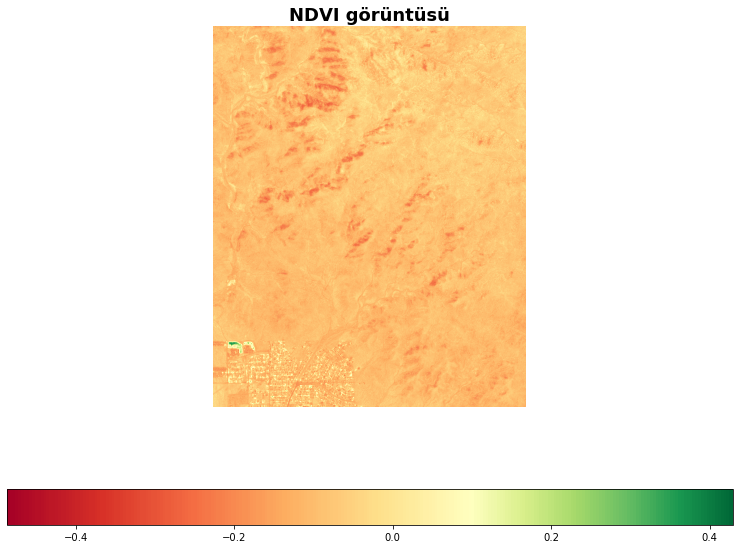

In [35]:
min=np.nanmin(ndvi)
max=np.nanmax(ndvi)
mid=0.1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


cmap = plt.cm.RdYlGn 

cax = ax.imshow(ndvi, cmap=cmap, clim=(min, max), norm=RenkNormalizasyonu(midpoint=mid,vmin=min, vmax=max))

ax.axis('off')
ax.set_title('NDVI görüntüsü', fontsize=18, fontweight='bold')

cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)

fig.savefig("output/ndvi-fig.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

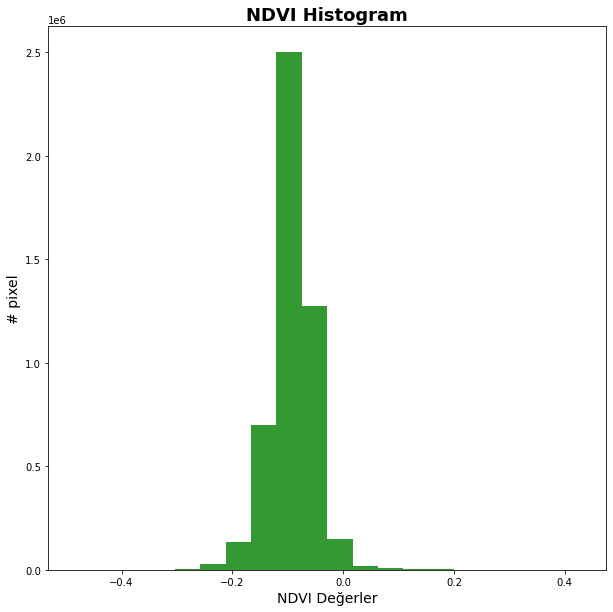

In [36]:

fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI Değerler", fontsize=14)
plt.ylabel("# pixel", fontsize=14)


x = ndvi[~np.isnan(ndvi)]
numBins = 20
ax.hist(x,numBins,color='green',alpha=0.8)

fig2.savefig("output/ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()